In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('CIPLA.csv')
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data = data.dropna()

In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4660 entries, 0 to 4693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4660 non-null   datetime64[ns]
 1   Open    4660 non-null   float64       
 2   High    4660 non-null   float64       
 3   Low     4660 non-null   float64       
 4   Close   4660 non-null   float64       
 5   Volume  4660 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 254.8 KB


In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2005-01-03,128.000000,128.800003,126.400002,127.500000,413807.0
1,2005-01-04,128.660004,128.800003,126.199997,127.059998,474117.0
2,2005-01-05,127.000000,127.019997,114.800003,120.459999,769930.0
3,2005-01-06,122.000000,122.040001,116.000000,117.400002,1237895.0
4,2005-01-07,117.239998,118.779999,116.019997,116.639999,1145887.0


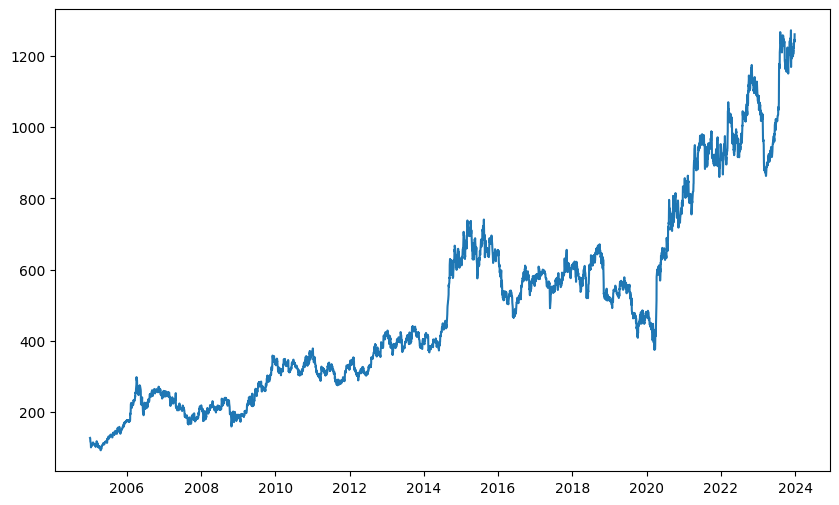

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.show()

In [6]:
len(data)

4660

In [7]:
row = int(len(data)*0.9)
train_data = list(data[:row]['Close'])
test_data = list(data[row:]['Close'])
print(train_data[:10] ,len(train_data))
print(test_data[:10], len(test_data))

[127.5, 127.059998, 120.459999, 117.400002, 116.639999, 112.68, 107.160004, 101.019997, 105.739998, 106.279999] 4194
[921.400024, 910.5, 902.25, 895.450012, 882.700012, 866.900024, 891.700012, 904.099976, 927.849976, 932.150024] 466


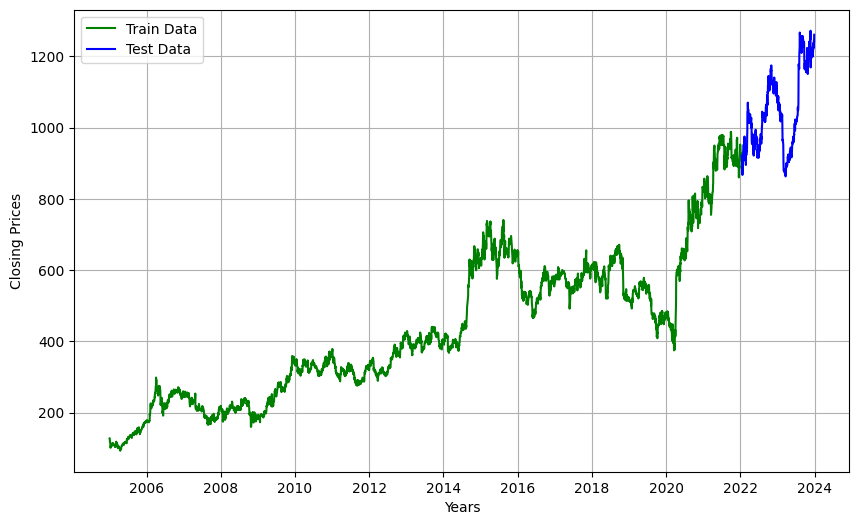

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data[0:row]['Date'],data[0:row]['Close'], 'green', label='Train Data')
plt.plot(data[row:]['Date'],data[row:]['Close'], 'blue', label='Test Data')
plt.legend()

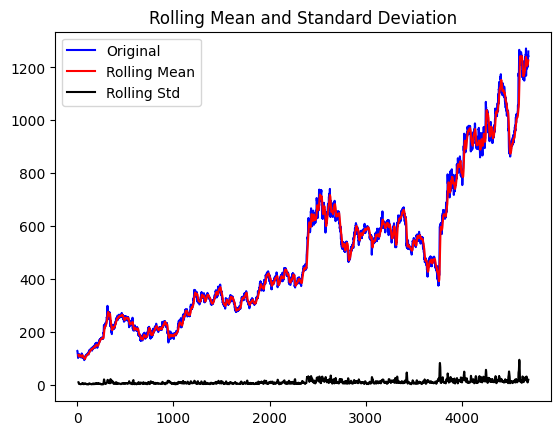

Results of dickey fuller test
Test Statistics                   0.333903
p-value                           0.978848
No. of lags used                  1.000000
Number of observations used    4658.000000
critical value (1%)              -3.431755
critical value (5%)              -2.862161
critical value (10%)             -2.567100
dtype: float64


In [10]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data['Close'])

In [25]:
returns = data['Close'].pct_change().dropna()
returns

1      -0.008867
2      -0.012123
3      -0.003426
4       0.014768
5      -0.009329
          ...   
4689    0.001971
4690    0.009637
4691   -0.007440
4692    0.004123
4693   -0.002965
Name: Close, Length: 4686, dtype: float64

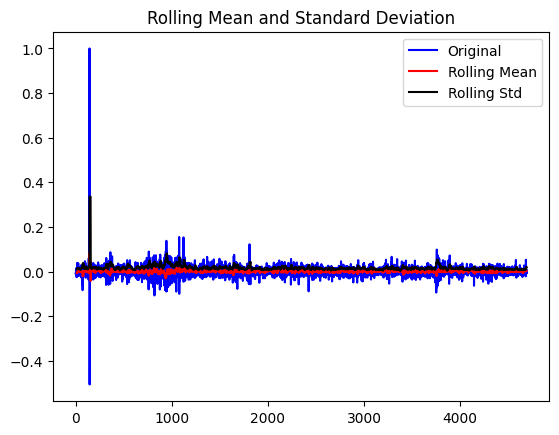

Results of dickey fuller test
Test Statistics                 -39.155480
p-value                           0.000000
No. of lags used                  3.000000
Number of observations used    4682.000000
critical value (1%)              -3.431747
critical value (5%)              -2.862158
critical value (10%)             -2.567099
dtype: float64


In [26]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(returns)



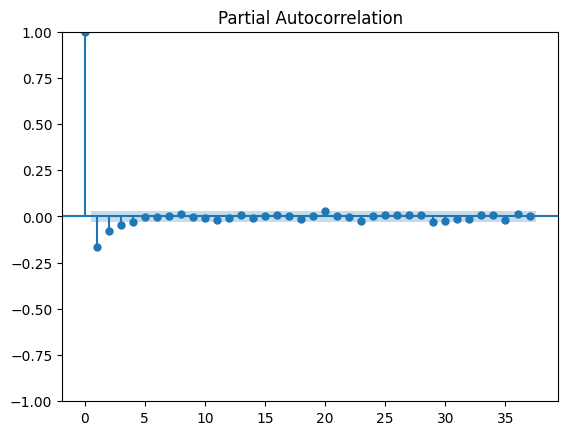

In [27]:
plot_pacf(returns, method = 'ywm')
plt.show()

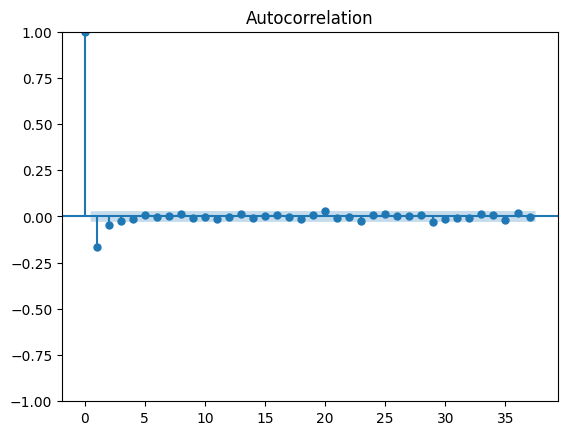

In [13]:
plot_acf(returns)
plt.show()

In [11]:
model_predictions = []
n_test_obser = len(test_data)
print(train_data[:10])
print(test_data[:10])

[127.5, 127.059998, 120.459999, 117.400002, 116.639999, 112.68, 107.160004, 101.019997, 105.739998, 106.279999]
[921.400024, 910.5, 902.25, 895.450012, 882.700012, 866.900024, 891.700012, 904.099976, 927.849976, 932.150024]


In [9]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(data['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33816.015, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33826.137, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33812.716, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33813.187, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33827.446, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=33813.907, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33814.207, Time=0.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33814.452, Time=2.98 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=33814.418, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 8.524 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4660
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -16903.358
Date:                Fri, 17 May 2024   

In [10]:
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat


# Walk-forward validation
history = [x for x in train_data]
predictions = list()
for t in range(len(test_data)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test_data[t]
    history.append(obs)

In [14]:
for i in range(n_test_obser):
    model = ARIMA(train_data, order=(1, 1, 0))  #p,d,q
    
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output)
    model_predictions.append(output)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

[923.22301478]
[921.47356326]
[910.84008758]
[902.50462084]
[895.65845478]
[883.08679479]
[867.36758852]
[890.93181246]
[903.73041384]
[927.16762974]
[932.02830395]
[944.39580458]
[945.18737811]
[951.32319467]
[952.27755443]
[946.07961111]
[933.89299505]
[948.17220774]
[967.37192776]
[974.46871041]
[958.50244849]
[922.66048335]
[932.26534785]
[927.97464234]
[908.86082992]
[906.01240309]
[912.91367005]
[915.68113879]
[895.34847954]
[920.84623575]
[924.95432779]
[923.6402051]
[934.14838934]
[932.06830971]
[940.26238957]
[967.59487794]
[980.96623879]
[986.65970024]
[1042.99507079]
[1048.30677959]
[1069.25866453]
[1056.13497311]
[1048.57492637]
[1049.91326328]
[1032.76823627]
[1015.29574145]
[1028.7661436]
[1013.73215091]
[1018.22739632]
[1038.30595183]
[1032.2161107]
[1018.8290349]
[1015.03557407]
[1027.48833297]
[1021.45944401]
[1028.2247483]
[1036.69198786]
[1012.28648484]
[1023.2384265]
[1027.20248722]
[1016.58770765]
[1026.81321071]
[999.7750263]
[1011.48066883]
[998.60026215]
[967.86

In [11]:
print(model_fit.summary())

NameError: name 'model_fit' is not defined

In [16]:
len(model_predictions)

466

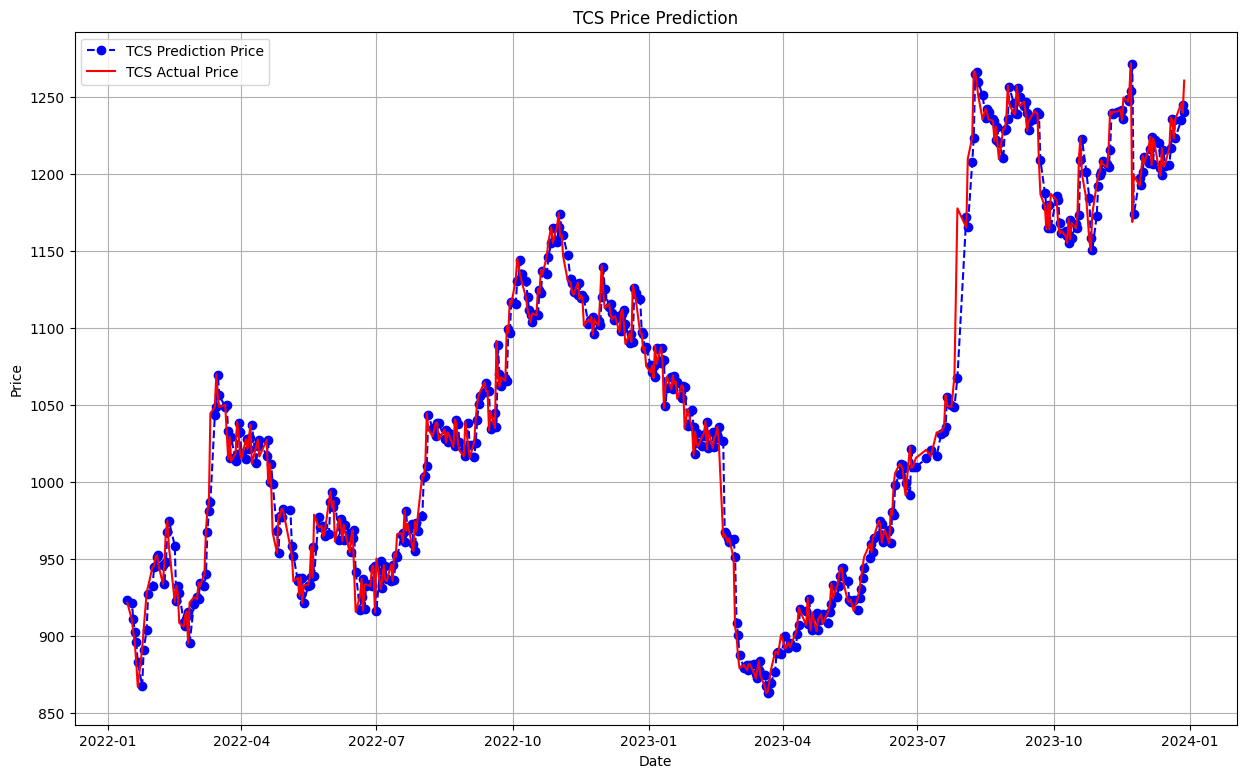

In [12]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = data[row:].Date
plt.plot(date_range, predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'TCS Prediction Price')
plt.plot(date_range, test_data, color = 'red', label = 'TCS Actual Price')

plt.title('TCS Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [13]:
mape = np.mean(np.abs(np.array(predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: ',(mape))
print('Accuracy: ', (100-(mape*100)))

MAPE:  0.010320044803249466
Accuracy:  98.96799551967506
